# GOLD PRICE PREDICTION

####  Aim :

* The main aim is to predict the stock price for the Given data 

#### Steps:

* Importing the Data from source (Our Case already in the Local Machine)
* Exploratory Data Analysis
* Feature Engineering
* Model Selection
* Model Building with Hyperparamter Tuning
* Deployment Phase

### 1.0 Importing the Data From Source

In [1]:
### Libraries

import pandas as pd
import numpy as np
import os
### Here we need to read Dataset by Year and merge to form a full dataset 

files = [files for files in os.listdir("C:\Python\Datasets\Deployment Models\Gold_Price_Prediction_App") if "dataset" in files ]
print(files)

dataset = pd.DataFrame()

for file in files:
    data = pd.read_csv(file, names=["Date","Price"])
    dataset = pd.concat([dataset, data],axis=0)
dataset.reset_index(inplace=True)
dataset.drop("index",axis=1,inplace=True)
dataset

['dataset2013.csv', 'dataset2014.csv', 'dataset2015.csv', 'dataset2016.csv', 'dataset2017.csv', 'dataset2018.csv']


,Date,Price
0,31-01-2013,2987
1,30-01-2013,3024
2,29-01-2013,3026
3,28-01-2013,3035
4,27-01-2013,3033
...,...,...
2137,05-11-2018,3173
2138,04-11-2018,3176
2139,03-11-2018,3176
2140,02-11-2018,3175


In [2]:
### How many rows and Columns in Dataset
dataset.shape

(2142, 2)

In [3]:
### Set the index as Date
dataset.set_index("Date", inplace=True)
dataset.head()

,Price
Date,
31-01-2013,2987
30-01-2013,3024
29-01-2013,3026
28-01-2013,3035
27-01-2013,3033


In [4]:
### Convert the Price column as Integer
dataset["Price"]=pd.to_numeric(dataset["Price"],downcast="integer",errors="coerce")

In [5]:
### Now look at the information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 31-01-2013 to 01-11-2018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2141 non-null   float64
dtypes: float64(1)
memory usage: 25.1+ KB


In [6]:
dataset.head()

,Price
Date,
31-01-2013,2987.0
30-01-2013,3024.0
29-01-2013,3026.0
28-01-2013,3035.0
27-01-2013,3033.0


In [7]:
dataset.describe()

,Price
count,2141.000000
mean,2866.297992
std,177.378256
min,2468.000000
25%,2706.000000
50%,2887.000000
75%,3001.000000
max,3439.000000


In [8]:
### Checking for Nan Values
dataset.isnull().sum()

Price    1
dtype: int64

### 2.0 Exploratory Data Analysis(EDA):

In [9]:
### Importing the Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [10]:
### Setting the parameters for plot
rcParams["figure.figsize"]=14,8
plt.style.use("ggplot")

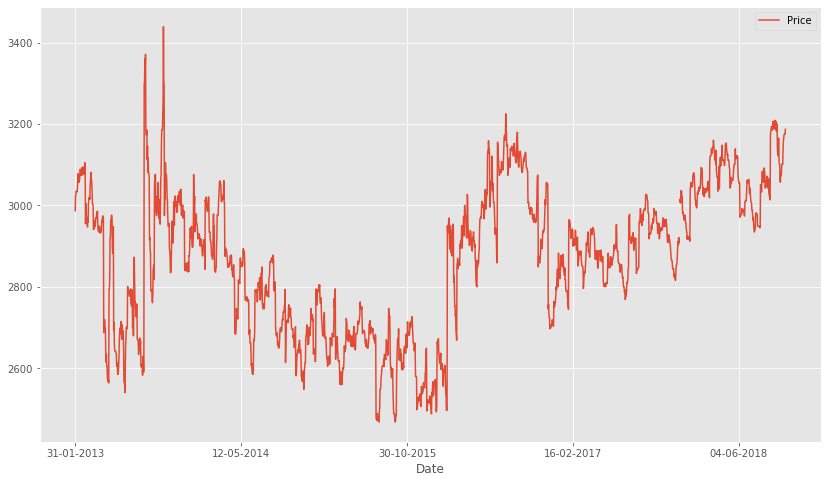

In [11]:
dataset.plot()

From the above Data its been Clear that the data is Seasonal so that using dickey fuller test for confirming the data is seasonal we are going to test whether the data is seasonal or not by assuming Alternate Hypothesis - Seasonal Null Hypothesis - Not seasonal for that if p <= 0.05 then we need to reject alternate Hypothesis

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
### Alternate Hypothesis - Seasonal  and Null Hypothesis - Not Seasonal

def adfuller_test(test):
    results=adfuller(test)
    labels=["ad-fuller test result","p-value","lags","No.of.Observations"]
    
    for value,label in zip(results, labels):
        print(label+":"+str(value))
    if results[1]<0.05:
        print("the alternate Hypothesis is accepted and the data is Not seasonal")
    else:
        print("The Null hypothesis is accepted and the data is Seasonal")

In [15]:
adfuller_test(dataset["Price"])

ad-fuller test result:-2.308640008172074
p-value:0.169196537129279
lags:23
No.of.Observations:2118
The Null hypothesis is accepted and the data is Seasonal


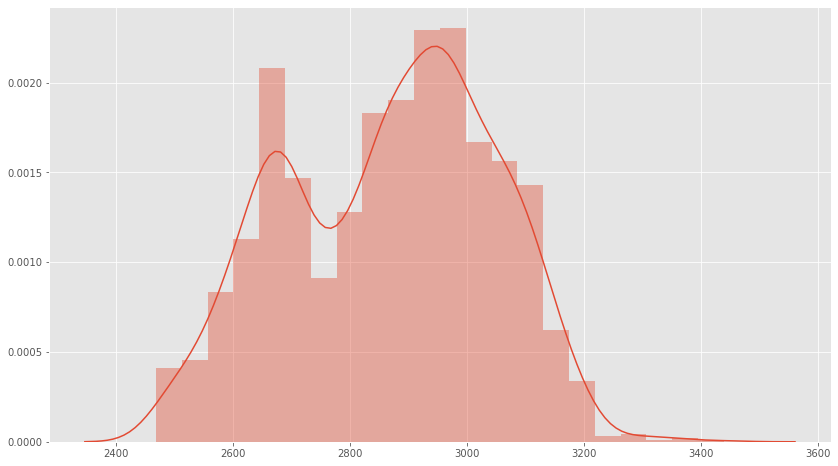

In [16]:
sns.distplot(dataset)

From the above picture the data is Not gaussian distribution so we need to convert the data in Gaussian distribution Becasue The algorithms like Linear regression and Logistic regression assumes the data follows Gaussian Distribution

In [17]:
### Q-Q plot
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

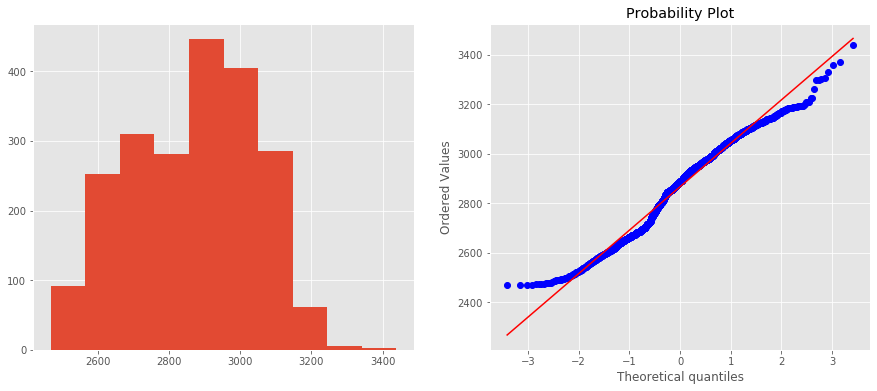

In [18]:
import scipy.stats as stats

diagnostic_plots(dataset, "Price")

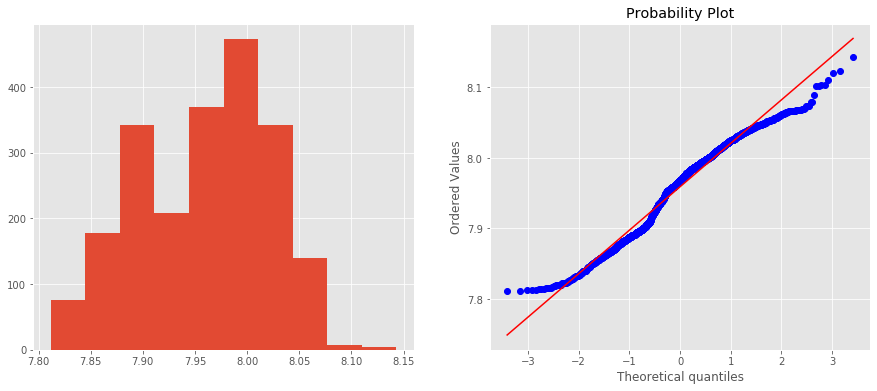

In [19]:
### Logarithmic Transmission
data=dataset.copy()
data['Log_Price']=np.log(data['Price']+1)
diagnostic_plots(data,'Log_Price')

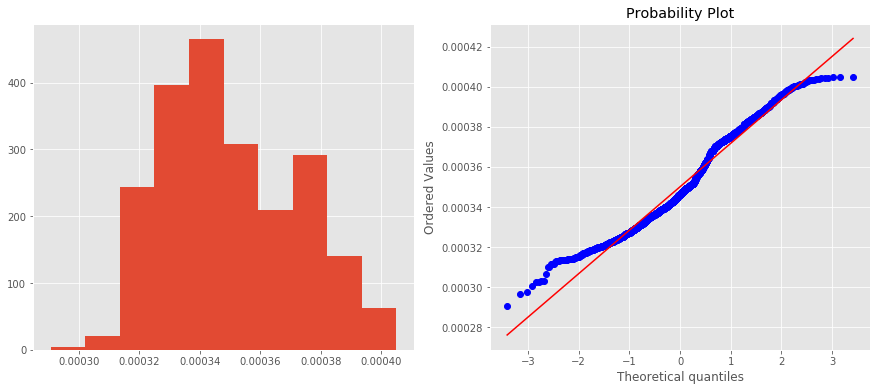

In [20]:
### reciprocal Transmission
data['Rec_Price']=1/(data['Price']+1)
diagnostic_plots(data,'Rec_Price')

Optimal lambda:  2.133303784403194


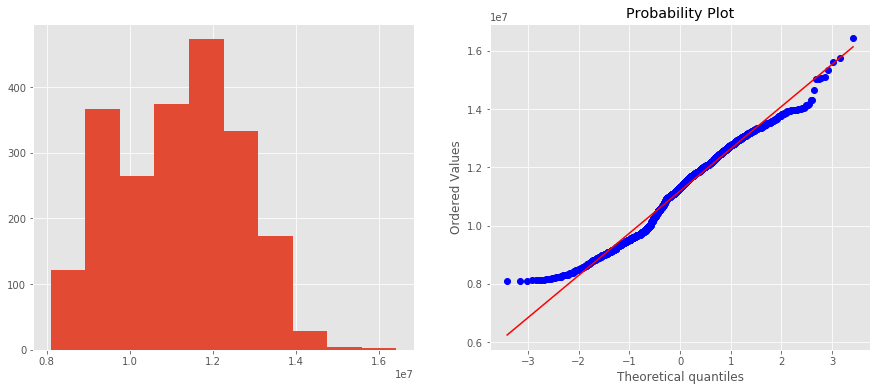

In [21]:
### Boxcox Transformation
data['Price_boxcox'], param = stats.boxcox(data.Price+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Price_boxcox')

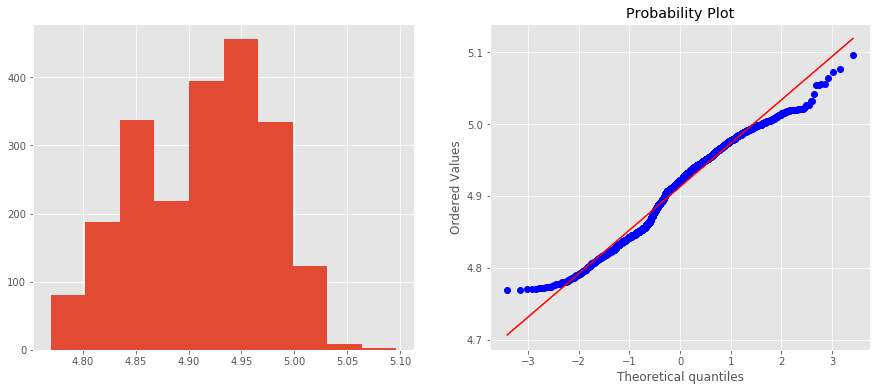

In [22]:
### Exponential Plot
data['Exp_Price']=data['Price']**(1/5)
diagnostic_plots(data,'Exp_Price')

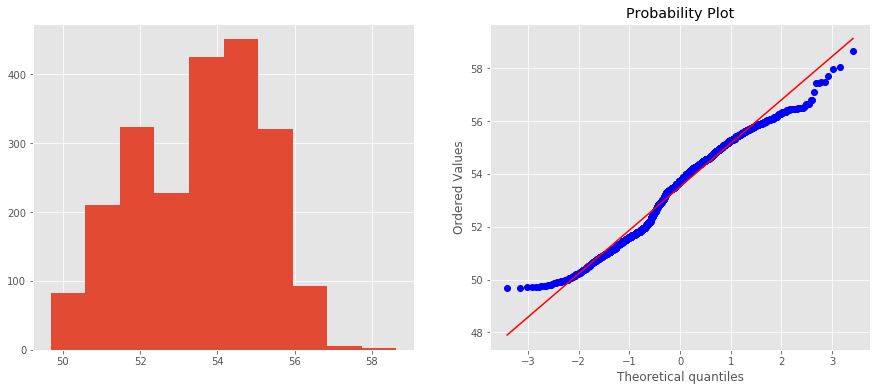

In [23]:
### Square root Transmission
data['sqr_Price']=data['Price']**(1/2)
diagnostic_plots(data,'sqr_Price')

From the above Graphs the Original Model Seems to be Better so Lets have an Original Dataset as well

Text(0, 0.5, 'Price')

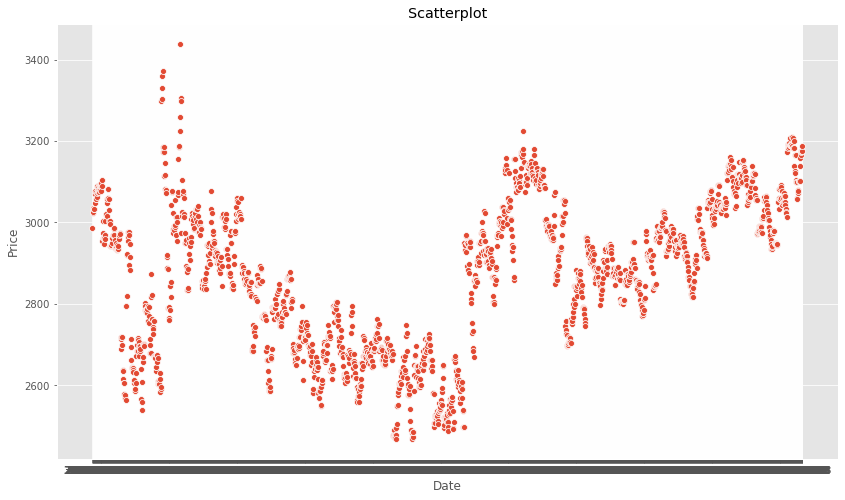

In [24]:
sns.scatterplot(x=dataset.index, y="Price", data=dataset)
plt.title("Scatterplot")
plt.xlabel("Date")
plt.ylabel("Price")

### 3.0 Feature Engineering

In [14]:
### Filling the nan Values with Median in this Case
median = dataset["Price"].median()
dataset.fillna(median, inplace=True)

In [25]:
### Scale and make the data as 1 dimensional array
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(dataset["Price"]).reshape(-1,1))

In [26]:
### have a Look at our one dimensional array
df1

array([[0.53450051],
       [0.57260556],
       [0.57466529],
       ...,
       [0.72914521],
       [0.72811535],
       [0.74047374]])

In [27]:
###splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
### Length of our training and test data
training_size,test_size

(1392, 750)

In [29]:
train_data

array([[0.53450051],
       [0.57260556],
       [0.57466529],
       ...,
       [0.51184346],
       [0.507724  ],
       [0.53759011]])

* Here we need to create our own Dataset like the exapmle Given Below
* Similarly we need to done for Both Train and Test Data
  
*  F1 |  F2 |  F3 | o/p
*  1  |  2  |  3  |  4
*  2  |  3  |  4  |  5
*  5  |  6  |  7  |  8

In [30]:
### Creating The Dataset
def Create_Dataset(data, timestep):
    Xdata,Ydata=[],[]
    for i in range(len(data)-timestep-1):      ### This is 1....5   o/p=6
        a=data[i:(i+timestep),0]
        Xdata.append(a)
        Ydata.append(data[i+timestep,0])
    return np.array(Xdata),np.array(Ydata)

In [31]:
timestep=5
x_train,y_train=Create_Dataset(train_data, timestep)
x_test,y_test=Create_Dataset(test_data,timestep)

In [32]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1386, 5) (1386,) (744, 5) (744,)


* Now we have created the train and test dataset

In [33]:
x_train

array([[0.53450051, 0.57260556, 0.57466529, 0.58393409, 0.58187436],
       [0.57260556, 0.57466529, 0.58393409, 0.58187436, 0.58187436],
       [0.57466529, 0.58393409, 0.58187436, 0.58187436, 0.58290422],
       ...,
       [0.52523172, 0.51184346, 0.51493306, 0.51493306, 0.5046344 ],
       [0.51184346, 0.51493306, 0.51493306, 0.5046344 , 0.5046344 ],
       [0.51493306, 0.51493306, 0.5046344 , 0.5046344 , 0.51184346]])

In [34]:
y_train

array([0.58187436, 0.58290422, 0.59732235, ..., 0.5046344 , 0.51184346,
       0.507724  ])

### 4.0 Model Selection:

Now we need to select the Optimum Model as a regressor that Could Perform Well:

For that Following steps we need to follow:
* Importing the Different Models Using Sklearn Library 
* Building Pipeline For each Model
* Iterate Through Each Model
* Finally calculate accuracy and take the Best Model

In [35]:
### Importing the different Models Library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn.pipeline import Pipeline  ### For Building Pipelines

In [36]:
### Making the Pipelines for Models
pipeline_linear_regression = Pipeline([("Linear Regression",LinearRegression())])
pipeline_random_forest_regressor = Pipeline([("Random Forest Regressor",RandomForestRegressor(n_estimators=100))])
pipeline_decision_tree_regressor = Pipeline([("Decision Tree Regressor",DecisionTreeRegressor())])
pipeline_kneighbors_regressor = Pipeline([("KNeighbors Regressor",KNeighborsRegressor())])
pipeline_support_vector_regressor = Pipeline([("Support Vector Regressor",SVR(kernel="rbf", gamma=0.5, degree=2, C=1e3))])
pipeline_gradient_boosting_regressor = Pipeline([("GradientBoostingRegressor",GBR())])

In [37]:
### Fitting all the Models to the Data
pipelines=[pipeline_linear_regression,pipeline_random_forest_regressor,pipeline_decision_tree_regressor, pipeline_kneighbors_regressor, pipeline_support_vector_regressor, pipeline_gradient_boosting_regressor]

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [38]:
### Making the dictionary for Models to find which has More efficiency
pipe_dict={0:"Linear Regression",
           1:"Random Foresr Regressor",
           2:"Decision Tree Regressor",
           3:"KNeighbors Regressor",
           4:"Support Vector Regressor",
           5:"Gradient Boosting Regressor"}

best_accuracy=0
best_classifier=""

In [39]:
### Calculate the Score for each Model
for i, model in enumerate(pipelines):
    print("{} has an score of {}".format(pipe_dict[i],model.score(x_test,y_test)))

Linear Regression has an score of 0.9539443702125592
Random Foresr Regressor has an score of 0.9366755915512063
Decision Tree Regressor has an score of 0.8313488405294645
KNeighbors Regressor has an score of 0.9249180602861804
Support Vector Regressor has an score of 0.9184149966027583
Gradient Boosting Regressor has an score of 0.9456182461035021


In [40]:
for i,model in enumerate(pipelines):
    if  model.score(x_test, y_test)>best_accuracy:
        best_accuracy = model.score(x_test, y_test)
        best_pipline = model
        best_classifier = i
print("best Model is {}".format(pipe_dict[best_classifier]))

best Model is Linear Regression


### 5.0 Model Building with Hyperparamter Tuning

In [41]:
### Making the Linear Regression Model
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
### Calculating the MSE, RMSE, R^2 and adjusted R^2
from sklearn.metrics import mean_squared_error, r2_score

prediction = linearregression.predict(x_test)
MSE=mean_squared_error(y_test, prediction)
RMSE=np.sqrt(MSE)
r2_score=r2_score(y_test,prediction)
intercept=linearregression.intercept_


print("MSE:{}  RMSE:{}  r2_Score:{}   Intercept:{}".format(MSE, RMSE, r2_score, intercept))

MSE:0.0005969426962786681  RMSE:0.024432410775006793  r2_Score:0.9539443702125592   Intercept:0.008899204757741974


* The Model is Been Looking Good with Low RMSE Value and Good r2_score
* Since the Model Has an Very good Performance We didnt go ahead with any Hyperparamtre Tuning

### 6.0 Deployment Phase:

In [43]:
### Imoprt the Libraries
import pickle

### Save the Model to Local disk
pickle.dump(linearregression,open("model.pkl","wb"))

In [44]:
pickle.dump(scaler,open("scaler.pkl","wb"))